<a href="https://colab.research.google.com/github/alavalah/411/blob/main/Akhila_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AKhila_dataset.csv")

In [ ]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [ ]:
df.isnull().sum()

,0
Timestamp,0
Age,1
Primary streaming service,1
Hours per day,0
While working,3
Instrumentalist,4
Composer,1
Fav genre,0
Exploratory,0
Foreign languages,4


In [ ]:
df= df.drop("Timestamp",axis =1)

In [ ]:
for col in df.select_dtypes(include='object'):
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print("Unique values:", unique_values)
    print("\n")

Column: Primary streaming service
Unique values: ['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' nan]


Column: While working
Unique values: ['Yes' 'No' nan]


Column: Instrumentalist
Unique values: ['Yes' 'No' nan]


Column: Composer
Unique values: ['Yes' 'No' nan]


Column: Fav genre
Unique values: ['Latin' 'Rock' 'Video game music' 'Jazz' 'R&B' 'K pop' 'Country' 'EDM'
 'Hip hop' 'Pop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']


Column: Exploratory
Unique values: ['Yes' 'No']


Column: Foreign languages
Unique values: ['Yes' 'No' nan]


Column: Frequency [Classical]
Unique values: ['Rarely' 'Sometimes' 'Never' 'Very frequently']


Column: Frequency [Country]
Unique values: ['Never' 'Sometimes' 'Very frequently' 'Rarely']


Column: Frequency [EDM]
Unique values: ['Rarely' 'Never' 'Very frequently' 'Sometimes']


Column: Frequency [Folk]
Unique values: ['Never' 'Rarely' 'Sometimes' 'Very frequently']


Column: Fr

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Dictionary to store the encoding mappings for each column
encoding_mappings = {}

# Loop through each column in the DataFrame
for col in df.columns:
    # Check if the column contains categorical data (strings or objects)
    if df[col].dtype == 'object':
        # Initialize LabelEncoder
        le = LabelEncoder()

        # Fit and transform the column to encode it
        df[col] = le.fit_transform(df[col])

        # Convert the encoded column to categorical dtype
        df[col] = pd.Categorical(df[col])

        # Store the unique value mappings for the column
        encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# The DataFrame now has the encoded and categorized columns, and `encoding_mappings` stores the key for each column
print("Encoding mappings:", encoding_mappings)


Encoding mappings: {'Primary streaming service': {'Apple Music': 0, 'I do not use a streaming service.': 1, 'Other streaming service': 2, 'Pandora': 3, 'Spotify': 4, 'YouTube Music': 5, nan: 6}, 'While working': {'No': 0, 'Yes': 1, nan: 2}, 'Instrumentalist': {'No': 0, 'Yes': 1, nan: 2}, 'Composer': {'No': 0, 'Yes': 1, nan: 2}, 'Fav genre': {'Classical': 0, 'Country': 1, 'EDM': 2, 'Folk': 3, 'Gospel': 4, 'Hip hop': 5, 'Jazz': 6, 'K pop': 7, 'Latin': 8, 'Lofi': 9, 'Metal': 10, 'Pop': 11, 'R&B': 12, 'Rap': 13, 'Rock': 14, 'Video game music': 15}, 'Exploratory': {'No': 0, 'Yes': 1}, 'Foreign languages': {'No': 0, 'Yes': 1, nan: 2}, 'Frequency [Classical]': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}, 'Frequency [Country]': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}, 'Frequency [EDM]': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}, 'Frequency [Folk]': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}, 'Frequency [Gosp

In [ ]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,18.0,4,3.0,1,1,1,8,1,1,156.0,...,2,3,0,2,3.0,0.0,1.0,0.0,3,0
1,63.0,3,1.5,1,0,0,14,1,0,119.0,...,2,1,3,1,7.0,2.0,2.0,1.0,3,0
2,18.0,4,4.0,0,0,0,15,0,1,132.0,...,0,1,1,3,7.0,7.0,10.0,2.0,1,0
3,61.0,5,2.5,1,0,1,6,1,1,84.0,...,2,0,0,0,9.0,7.0,3.0,3.0,0,0
4,18.0,4,4.0,1,0,0,12,1,0,107.0,...,3,3,0,1,7.0,2.0,5.0,9.0,0,0


In [ ]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [ ]:
df.corr()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
Age,1.000000,-0.135969,-0.044638,-0.073320,-0.137874,-0.036722,0.028185,-0.178837,-0.141359,-0.029928,...,0.041596,-0.195411,0.054530,-0.264178,-0.176662,-0.121563,0.006909,-0.130114,0.061422,NaN
Primary streaming service,-0.135969,1.000000,0.055892,0.060441,0.020931,-0.002156,-0.046349,0.168106,0.093165,0.015952,...,0.037758,0.068433,0.010572,0.064655,-0.016359,0.031948,0.018440,0.025474,-0.056192,NaN
Hours per day,-0.044638,0.055892,1.000000,0.279170,-0.013823,0.125785,-0.011470,0.141783,0.078003,0.042554,...,0.114505,0.172611,0.070008,0.031556,0.049319,0.110527,0.141821,0.118729,-0.070650,NaN
While working,-0.073320,0.060441,0.279170,1.000000,0.094443,0.062313,-0.017680,0.135858,0.119932,0.019876,...,0.115437,0.080061,0.005300,0.134149,0.045272,0.055570,0.047878,0.086388,-0.111949,NaN
Instrumentalist,-0.137874,0.020931,-0.013823,0.094443,1.000000,0.410929,-0.123316,0.072757,0.016531,-0.027864,...,-0.101499,-0.122014,-0.033207,0.055973,0.023703,0.005614,0.032036,0.012567,-0.049238,NaN
Composer,-0.036722,-0.002156,0.125785,0.062313,0.410929,1.000000,-0.064203,0.099698,-0.025569,-0.018371,...,0.026129,0.000147,0.054821,-0.009949,-0.001549,0.050552,0.089141,0.018049,-0.046604,NaN
Fav genre,0.028185,-0.046349,-0.011470,-0.017680,-0.123316,-0.064203,1.000000,-0.022755,0.011847,0.047299,...,0.059091,0.032158,0.291126,0.154308,0.065824,0.032745,0.010224,0.019891,0.093255,NaN
Exploratory,-0.178837,0.168106,0.141783,0.135858,0.072757,0.099698,-0.022755,1.000000,0.178375,0.024187,...,0.169743,0.236283,0.162513,0.027356,0.021250,0.061541,0.053356,0.032219,-0.152499,NaN
Foreign languages,-0.141359,0.093165,0.078003,0.119932,0.016531,-0.025569,0.011847,0.178375,1.000000,-0.045143,...,0.129358,0.157034,0.010084,0.197606,0.073313,0.084484,0.036672,-0.018427,0.018470,NaN
BPM,-0.029928,0.015952,0.042554,0.019876,-0.027864,-0.018371,0.047299,0.024187,-0.045143,1.000000,...,-0.048094,0.060769,-0.040317,0.028348,-0.027050,0.041371,0.053591,0.018927,0.051514,NaN


In [ ]:
# Selecting only columns that are not categorical
# non_categorized_df = df.select_dtypes(exclude='category')


# non_categorized_df.head()

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Median for Age
df['Hours per day'].fillna(df['Hours per day'].mean(), inplace=True)  # Mean for Hours per day
df['BPM'].fillna(df['BPM'].median(), inplace=True)  # Median for BPM
df['Anxiety'].fillna(df['Anxiety'].mode()[0], inplace=True)  # Mode for Anxiety
df['Depression'].fillna(df['Depression'].mode()[0], inplace=True)  # Mode for Depression
df['Insomnia'].fillna(df['Insomnia'].median(), inplace=True)  # Median for Insomnia
df['OCD'].fillna(df['OCD'].median(), inplace=True)  # Median for OCD

<ipython-input-67-9def7e58fb5f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Median for Age
<ipython-input-67-9def7e58fb5f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

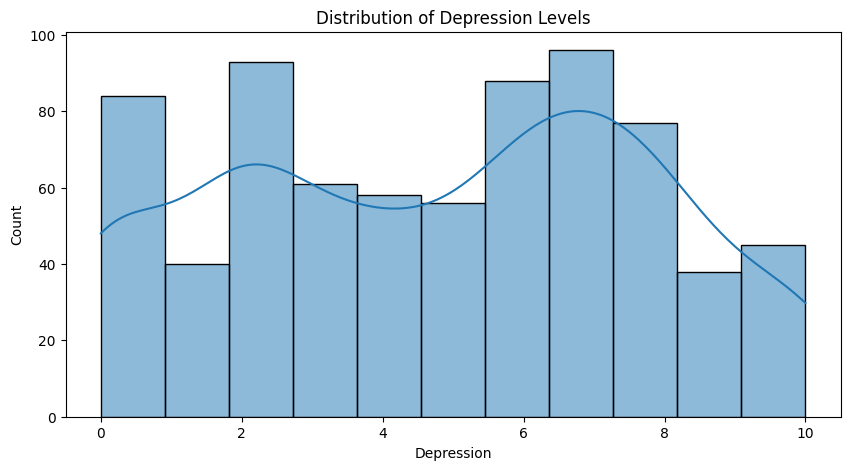

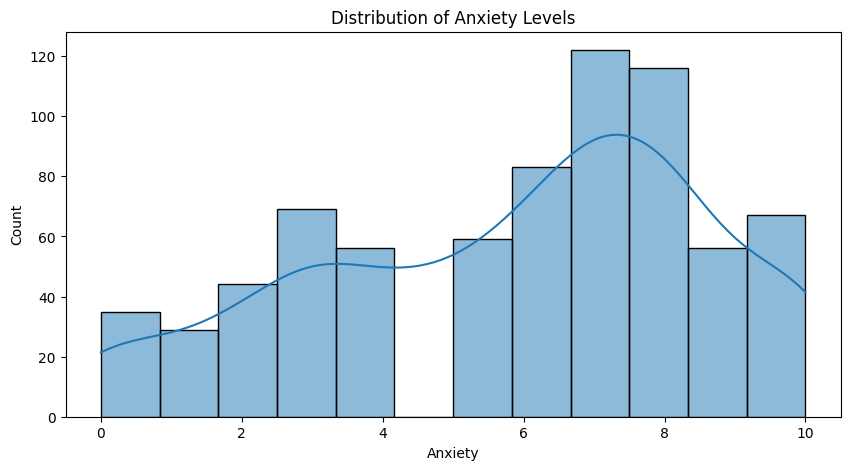

In [ ]:
#Distribution of Depression and Anxiety
import seaborn as sns
import matplotlib.pyplot as plt

# Depression distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Depression'], kde=True)
plt.title('Distribution of Depression Levels')
plt.show()

# Anxiety distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Anxiety'], kde=True)
plt.title('Distribution of Anxiety Levels')
plt.show()


# Insights from the Anxiety Level Distribution:

The histogram shows a slightly right-skewed distribution of anxiety levels.
The majority of individuals fall within the moderate range of anxiety (around 6-8).
There is a significant peak around 7, indicating a cluster of individuals experiencing moderate anxiety.
The distribution tails off towards higher anxiety levels, suggesting fewer individuals report severe anxiety.

## Summary of Both Depression and Anxiety Distributions:

Both depression and anxiety distributions exhibit similar patterns:

* **Moderate Levels Prevalent:** The majority of individuals report moderate levels of both depression and anxiety.
* **Right-Skewed Distributions:** Both distributions are slightly right-skewed, indicating a longer tail towards higher levels of depression and anxiety.
* **Clusters Around Moderate Scores:** There are noticeable clusters of individuals around moderate scores for both conditions.

This suggests that moderate levels of depression and anxiety are relatively common in the population studied, with fewer individuals experiencing severe levels.


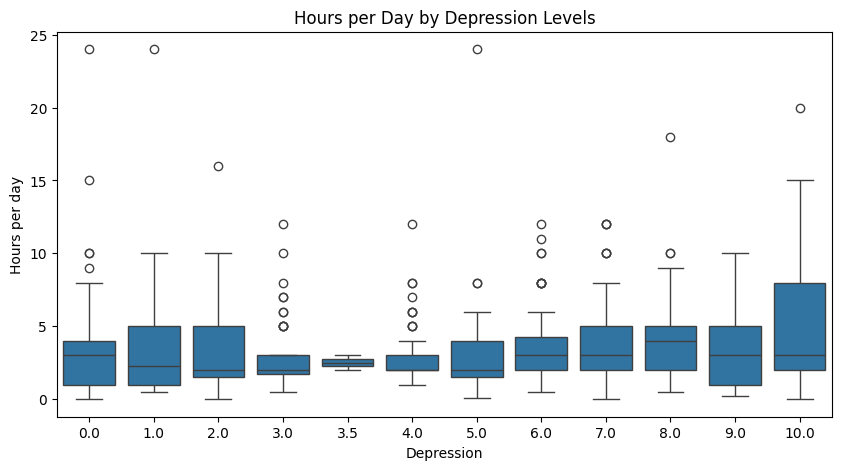

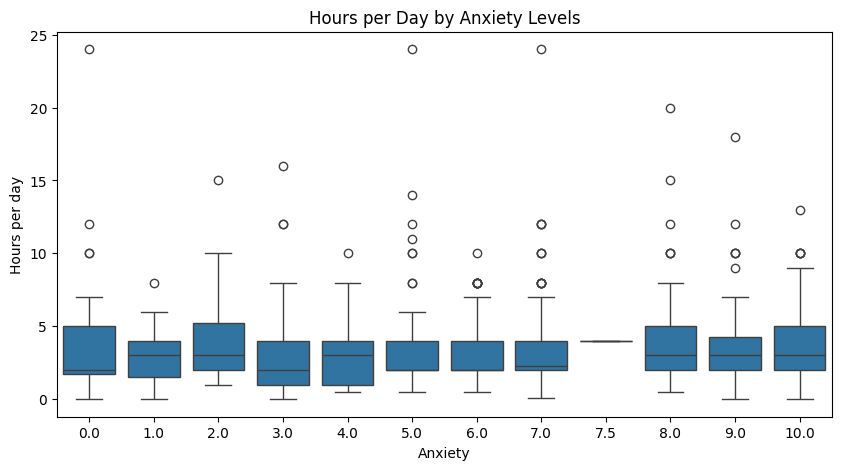

In [ ]:
#Box Plot of Hours per day by Depression and Anxiety
plt.figure(figsize=(10, 5))
sns.boxplot(x='Depression', y='Hours per day', data=df)
plt.title('Hours per Day by Depression Levels')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Anxiety', y='Hours per day', data=df)
plt.title('Hours per Day by Anxiety Levels')
plt.show()


## Summary of Box plot Visualizations

Both visualizations suggest a relationship between mental health (depression and anxiety) and daily activity levels.

**Key Observations:**

* Individuals with higher levels of depression and anxiety tend to spend fewer hours per day.
* There is greater variability in daily hours for people with lower levels of depression and anxiety.
* As mental health conditions worsen, there's a narrowing of the range of daily hours.
* This trend suggests that increased mental health challenges may lead to reduced activity levels.
* Further research is needed to confirm these findings and explore the underlying causes.


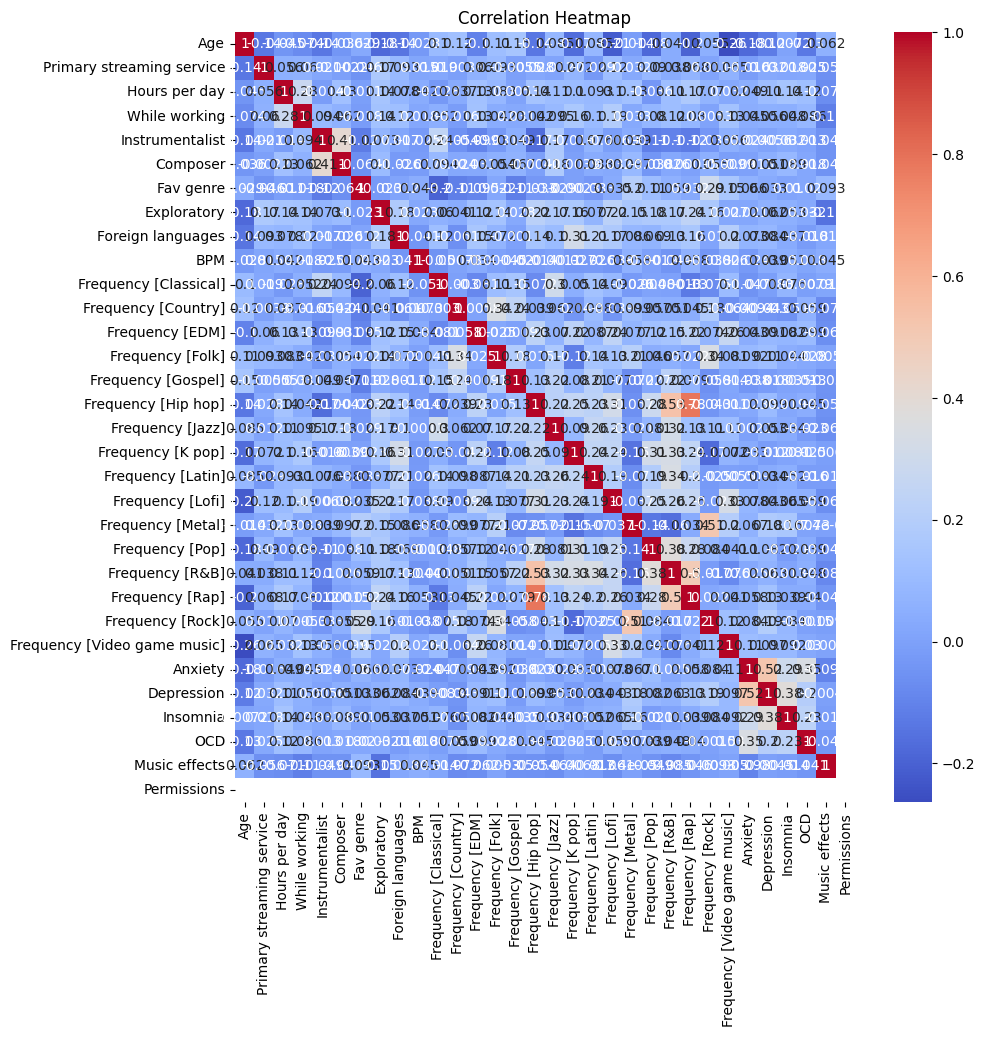

In [ ]:
#Heatmap of Correlations

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png', dpi=900, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Select the target columns
targets = ['Anxiety', 'Depression']

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Remove target columns from numerical columns
numerical_columns = [col for col in numerical_columns if col not in targets]

# Create a directory to save the images
save_dir = 'correlation_plots'
os.makedirs(save_dir, exist_ok=True)

# Plot correlation for numerical columns with Anxiety and Depression
for col in numerical_columns:
    plt.figure(figsize=(12, 5))

    # Plot correlation heatmap for col vs Anxiety
    plt.subplot(1, 2, 1)
    sns.heatmap(df[[col, 'Anxiety']].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation: {col} vs Anxiety')

    # Plot correlation heatmap for col vs Depression
    plt.subplot(1, 2, 2)
    sns.heatmap(df[[col, 'Depression']].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation: {col} vs Depression')

    # Save the plot as a PNG file
    plt.tight_layout()
    plt.savefig(f'{save_dir}/{col}_correlation_plot.png')
    plt.close()  # Close the plot to free up memory

# Optionally, print message after saving
print(f'Correlation plots saved to {save_dir}')


Correlation plots saved to correlation_plots


## Summary of Correlations

* **Age:** Age is negatively correlated with most variables, suggesting that as age increases, hours per day, anxiety, depression, insomnia, and OCD tend to decrease.
* **Hours per day:** Hours per day has a positive correlation with most variables, indicating that more active individuals tend to have higher levels of anxiety, depression, insomnia, and OCD.
* **BPM:** BPM has a weak positive correlation with anxiety, depression, and insomnia, suggesting a possible link between heart rate and mental health conditions.
* **Anxiety:** Anxiety is highly correlated with depression, insomnia, and OCD, confirming the close relationship between these mental health conditions.
* **Depression:** Depression is highly correlated with anxiety, insomnia, and OCD, indicating a strong connection between these conditions.
* **Insomnia:** Insomnia is correlated with anxiety, depression, and OCD, suggesting that sleep disturbances are often associated with these mental health conditions.
* **OCD:** OCD is correlated with anxiety, depression, and insomnia, indicating a connection between obsessive-compulsive disorder and these other mental health conditions.


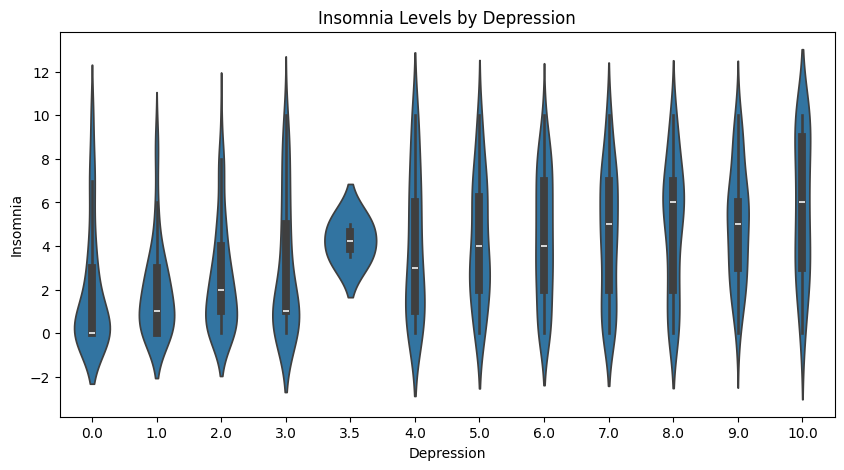

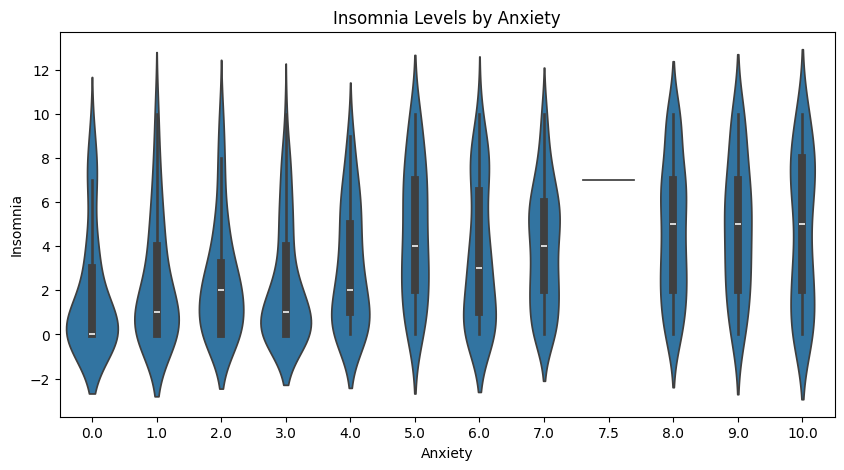

In [ ]:
# Violin Plot of Insomnia by Depression and Anxiety
plt.figure(figsize=(10, 5))
sns.violinplot(x='Depression', y='Insomnia', data=df)
plt.title('Insomnia Levels by Depression')
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(x='Anxiety', y='Insomnia', data=df)
plt.title('Insomnia Levels by Anxiety')
plt.show()


## Summary of Insomnia and Mental Health

Both depression and anxiety are strongly associated with insomnia. As the severity of depression or anxiety increases, the likelihood and severity of insomnia also tend to increase. However, the relationship is not linear, with the strongest association observed at moderate levels of depression and anxiety.

Further research is needed to fully understand the complex interplay between these mental health conditions and sleep disturbances and to develop effective interventions for managing both.


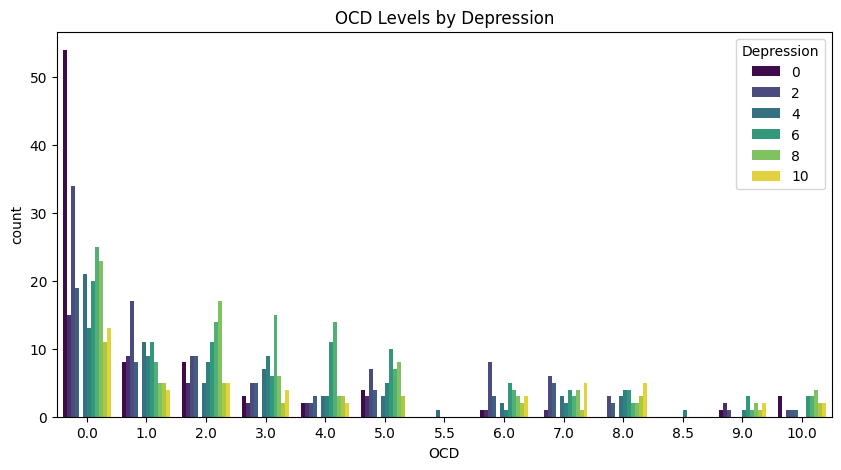

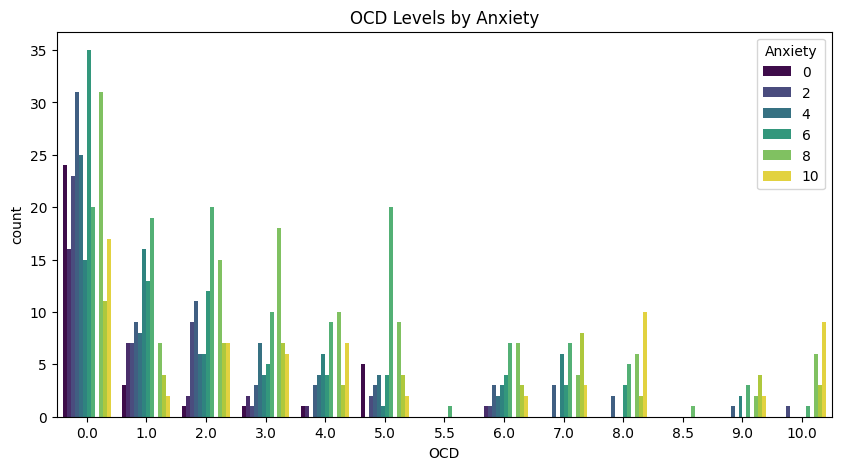

In [ ]:
#Count Plot of OCD Levels by Depression and Anxiety
plt.figure(figsize=(10, 5))
sns.countplot(x='OCD', hue='Depression', data=df, palette='viridis')
plt.title('OCD Levels by Depression')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='OCD', hue='Anxiety', data=df, palette='viridis')
plt.title('OCD Levels by Anxiety')
plt.show()


Both plots illustrate the relationship between OCD and other mental health conditions.

* **OCD and Depression:** Higher levels of depression are associated with higher levels of OCD.
* **OCD and Anxiety:** Higher levels of anxiety are associated with higher levels of OCD.

These findings suggest that OCD may be more prevalent in individuals with significant depression or anxiety symptoms. Further research is needed to determine the exact nature of these relationships and to identify effective interventions for managing OCD in the context of these comorbid conditions.


In [ ]:
# Change the values for 'Anxiety' and 'Depression' based on the condition
df['Anxiety'] = df['Anxiety'].apply(lambda x: 1 if x > 0 else 0)
df['Depression'] = df['Depression'].apply(lambda x: 1 if x > 0 else 0)

# Convert the columns to categorical dtype
df['Anxiety'] = pd.Categorical(df['Anxiety'])
df['Depression'] = pd.Categorical(df['Depression'])

# Verify the changes
print(df[['Anxiety', 'Depression']].head())

# Drop the columns 'Anxiety_cat' and 'Depression_cat' if they exist
df = df.drop(columns=['Anxiety_cat', 'Depression_cat'], errors='ignore')

# Verify the result after dropping the columns
df.head()


  Anxiety Depression
0       1          0
1       1          1
2       1          1
3       1          1
4       1          1


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,18.0,4,3.0,1,1,1,8,1,1,156.0,...,2,3,0,2,1,0,1.0,0.0,3,0
1,63.0,3,1.5,1,0,0,14,1,0,119.0,...,2,1,3,1,1,1,2.0,1.0,3,0
2,18.0,4,4.0,0,0,0,15,0,1,132.0,...,0,1,1,3,1,1,10.0,2.0,1,0
3,61.0,5,2.5,1,0,1,6,1,1,84.0,...,2,0,0,0,1,1,3.0,3.0,0,0
4,18.0,4,4.0,1,0,0,12,1,0,107.0,...,3,3,0,1,1,1,5.0,9.0,0,0


In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Preparing the data
# Features (all columns except target variables)
X = df.drop(columns=['Anxiety', 'Depression'])

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model 1: Predicting 'Anxiety'
y_anxiety = df['Anxiety']

# Train-test split for Anxiety
X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(X_scaled, y_anxiety, test_size=0.2, random_state=42)

# Model 2: Predicting 'Depression'
y_depression = df['Depression']

# Train-test split for Depression
X_train_depression, X_test_depression, y_train_depression, y_test_depression = train_test_split(X_scaled, y_depression, test_size=0.2, random_state=42)

# Function to train and evaluate models
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# List of models to use
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM (Support Vector Machine)": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Training and evaluating models for 'Anxiety'
print("Evaluating models for 'Anxiety':\n")
for model_name, model in models.items():
    print(f"Model: {model_name}")
    train_and_evaluate(model, X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety)
    print("\n" + "-"*50 + "\n")

# Training and evaluating models for 'Depression'
print("Evaluating models for 'Depression':\n")
for model_name, model in models.items():
    print(f"Model: {model_name}")
    train_and_evaluate(model, X_train_depression, X_test_depression, y_train_depression, y_test_depression)
    print("\n" + "-"*50 + "\n")


Evaluating models for 'Anxiety':

Model: Logistic Regression
Accuracy: 0.9459459459459459
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.96      0.99      0.97       142

    accuracy                           0.95       148
   macro avg       0.48      0.49      0.49       148
weighted avg       0.92      0.95      0.93       148

Confusion Matrix:
 [[  0   6]
 [  2 140]]

--------------------------------------------------

Model: Random Forest
Accuracy: 0.9594594594594594
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.96      1.00      0.98       142

    accuracy                           0.96       148
   macro avg       0.48      0.50      0.49       148
weighted avg       0.92      0.96      0.94       148

Confusion Matrix:
 [[  0   6]
 [  0 142]]

--------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Accuracy: 0.8783783783783784
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.88      1.00      0.94       130

    accuracy                           0.88       148
   macro avg       0.44      0.50      0.47       148
weighted avg       0.77      0.88      0.82       148

Confusion Matrix:
 [[  0  18]
 [  0 130]]

--------------------------------------------------

Model: SVM (Support Vector Machine)
Accuracy: 0.8783783783783784
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.88      1.00      0.94       130

    accuracy                           0.88       148
   macro avg       0.44      0.50      0.47       148
weighted avg       0.77      0.88      0.82       148

Confusion Matrix:
 [[  0  18]
 [  0 130]]

--------------------------------------------------

Model: K-Neare

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

<ipython-input-76-a862b18f0dca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anxiety', data=df, palette='Set2')
<ipython-input-76-a862b18f0dca>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=df, palette='Set2')


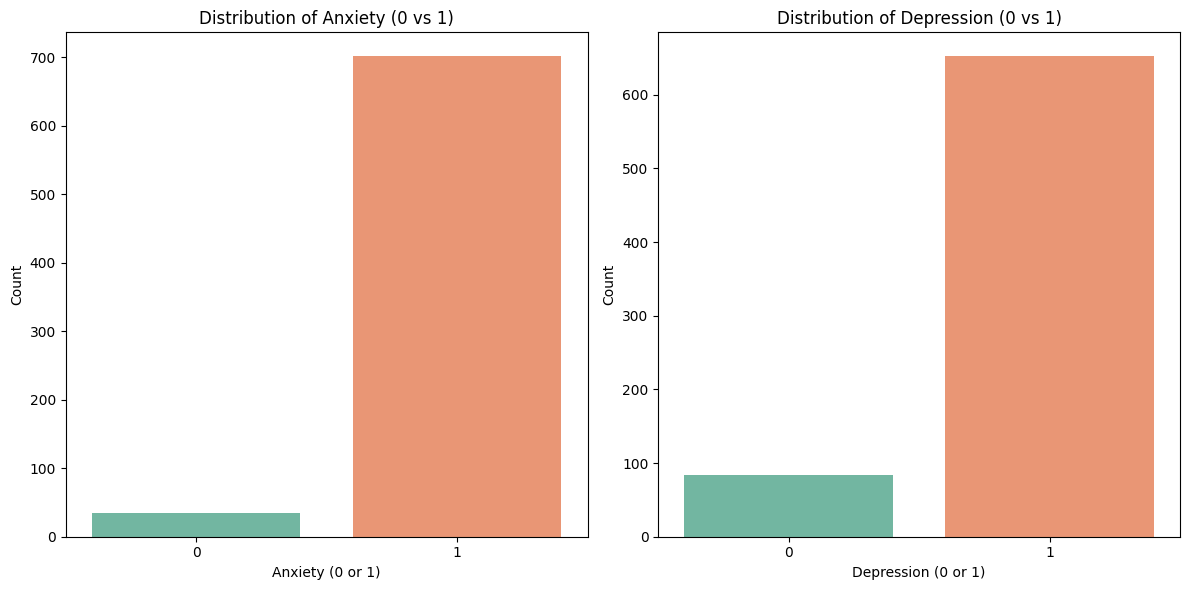

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot for 'Anxiety'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.countplot(x='Anxiety', data=df, palette='Set2')
plt.title('Distribution of Anxiety (0 vs 1)')
plt.xlabel('Anxiety (0 or 1)')
plt.ylabel('Count')

# Plot for 'Depression'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.countplot(x='Depression', data=df, palette='Set2')
plt.title('Distribution of Depression (0 vs 1)')
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# List of music genre columns
genre_columns = [
    'Frequency [R&B]',
    'Frequency [Rap]',
    'Frequency [Rock]',
    'Frequency [Video game music]'
    # Add more genre columns if there are additional genres
]

# Function to find the genre with the highest frequency
def get_genre_with_highest_frequency(row):
    # Get the genre with the maximum value
    max_value = row[genre_columns].max()

    # Get the corresponding genre column
    genre = row[genre_columns].idxmax()

    return genre.split('[')[1].split(']')[0]  # Extract genre name between square brackets

# Apply the function to create the new 'Music Genre' column
df['Music Genre'] = df.apply(get_genre_with_highest_frequency, axis=1)

# Check the result
print(df[['Music Genre']].head())



        Music Genre
0               Rap
1              Rock
2  Video game music
3               R&B
4               R&B


<ipython-input-78-047a60c07b33>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Music Genre', data=df, palette='Set2', order=df['Music Genre'].value_counts().index)


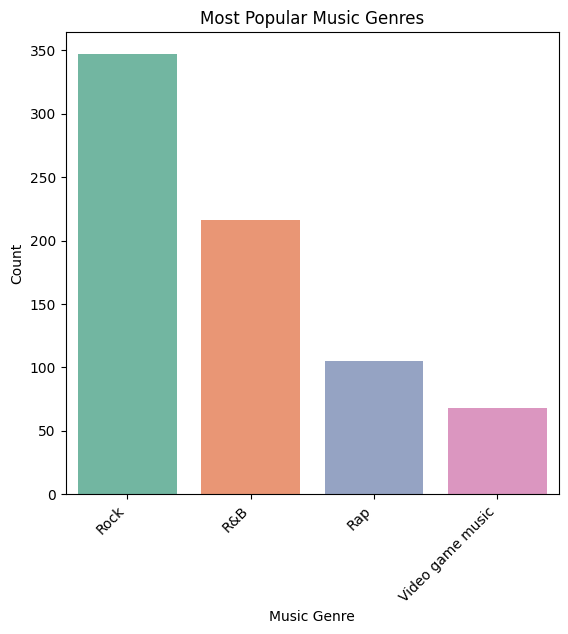

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot for "Which kind of music listened to the most"
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.countplot(x='Music Genre', data=df, palette='Set2', order=df['Music Genre'].value_counts().index)
plt.title('Most Popular Music Genres')
plt.xlabel('Music Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


plt.show()


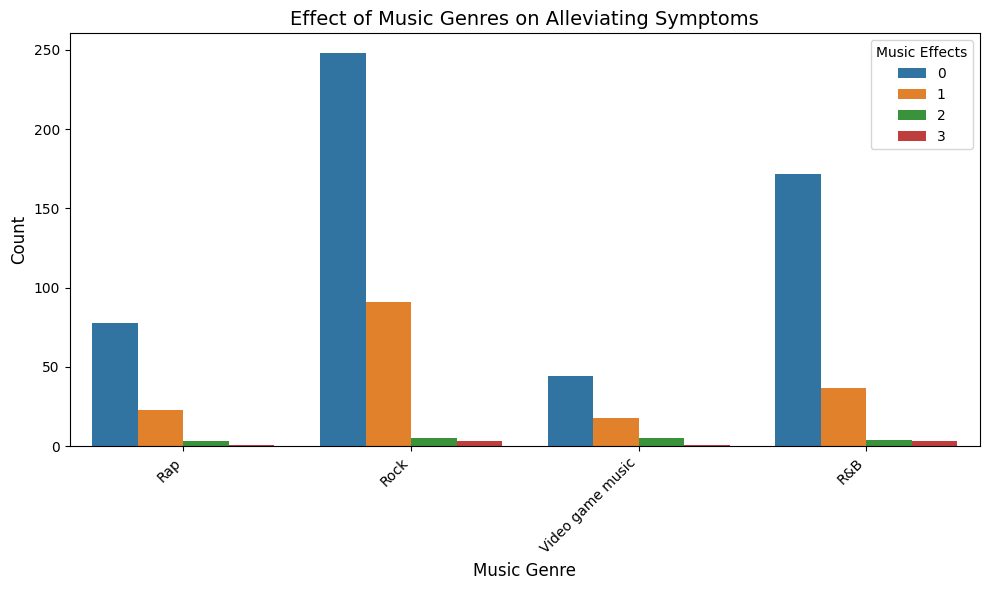

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot showing the effect of music genres on alleviating symptoms
plt.figure(figsize=(10, 6))
sns.countplot(x='Music Genre', hue='Music effects', data=df)

# Add labels and title
plt.title('Effect of Music Genres on Alleviating Symptoms', fontsize=14)
plt.xlabel('Music Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate genre names for better readability
plt.legend(title='Music Effects', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Accuracies for Each Model:
Anxiety:
Logistic Regression: 0.9459
Random Forest: 0.9595
SVM: 0.9595
K-Nearest Neighbors: 0.9595
Depression:
Logistic Regression: 0.8784
Random Forest: 0.8716
SVM: 0.8784
K-Nearest Neighbors: 0.8716

SyntaxError: invalid syntax (<ipython-input-80-e4ade6bde90b>, line 1)